# NumPy

> NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

NumPy is the foundation for so much in Python and data science. It's multidimensional array object allows for tremendous performance gains when compared against typical Python structures and operations. For this reason when dealing with large amount of numerical data NumPy is almost exlusively used. We will focus on learning about NumPy's array type and common utility functions for working with numerical data.

Let's compare some basic operations in standard Python vs NumPy. Let's begin by creating a list of 1 million random numbers uniformly distributed from 0.0 to 100.0.

In [1]:
import random

random.seed(10)
print(random.random())

0.5714025946899135


In [11]:
import random
random.seed(0)
print(random.uniform(0.0,100))
random_data = [random.uniform(0.0, 100.0) for _ in range(1000000)]
for _ in range(0,len(random_data)):
    print(_,random_data[_])

84.4421851525048
0 75.79544029403024
1 42.0571580830845
2 25.891675029296334
3 51.12747213686085
4 40.49341374504143
5 78.37985890347726
6 30.331272607892746
7 47.65969541523558
8 58.33820394550312
9 90.81128851953352
10 50.468685581739024
11 28.18378443997038
12 75.58042041572239
13 61.83689966753316
14 25.050634136244053
15 90.97462559682401
16 98.2785476037653
17 81.02172359965896
18 90.21659504395826
19 31.014756931933263
20 72.98317482601287
21 89.88382879679935
22 68.39839319154413
23 47.21427154527134
24 10.07012080683658
25 43.41718354537837
26 61.08869734438016
27 91.30110532378983
28 96.66063677707588
29 47.7009776552717
30 86.530992777164
31 26.04923103919594
32 80.50278270130224
33 54.86993038355893
34 1.4041700164018955
35 71.97046864039541
36 39.882354222426876
37 82.4844977148233
38 66.81532012318509
39 0.11428193144282783
40 49.35778664653247
41 86.76027754927809
42 24.3910876887132
43 32.520436274739005
44 87.04712321086546
45 19.106709150239055
46 56.75107406206719
47

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 29.435783512981082
990590 68.79119529964349
990591 17.74014540458172
990592 30.235071765616095
990593 25.624455302371686
990594 98.59974522947815
990595 13.113133628858154
990596 40.425318008134205
990597 68.52656682809932
990598 24.72538100083742
990599 98.7989211239315
990600 69.0203789391428
990601 65.22112377470654
990602 76.75120307367912
990603 95.86869205523536
990604 76.40061901564391
990605 64.05876212651617
990606 7.296259412884631
990607 34.43489779270613
990608 57.82299145613553
990609 49.7321771691275
990610 20.11916104566446
990611 82.60357237835046
990612 5.5683963485513965
990613 91.20722550678184
990614 89.07908490240175
990615 85.64988794957958
990616 69.92022792247215
990617 2.764123116429218
990618 98.49513884607912
990619 80.4920019430654
990620 58.18971918583058
990621 35.603163693773396
990622 58.53447603099885
990623 22.873952477834138
990624 1.6016708637363264
990625 63.77855891612124
990626 8.111922142003658
990627 48.96099294504999
990628 88.12090479169935
9

Let's perform and time a few simple operations on this list: sum and sort.

In [15]:
%%timeit
sum(random_data)

3.5 ms ± 32.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
%%timeit
sorted(random_data)

186 ms ± 18.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


The sum operation on a regular Python list of 1 million elements is a few milliseconds, and sorting is a few hundred milliseconds. Now let us convert this to a *NumPy array* and perform the same operations:

In [12]:
import numpy as np
numpy_random_data = np.array(random_data)
numpy_random_data

array([75.79544029, 42.05715808, 25.89167503, ..., 62.65250366,
       39.46958219, 34.53513678])

In [13]:
%%timeit
numpy_random_data.sum()

241 µs ± 2.23 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [14]:
%%timeit
numpy_random_data.sort()

21.3 ms ± 120 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Using NumPy arrays these times are reduced to a few hundred *microseconds* and a few milliseconds respectively for summing and sorting. This is a tremendous improvement! These times may not seem significant, but this is only summing and sorting - for larger and more complex operations the performance gains are even more substantial. Let's revisit how we even created the NumPy array:

```python
import numpy as np
numpy_random_data = np.array(random_data)
```

First we need to import NumPy into Python so that we can use it. It is conventional to alias the `numpy` package as `np`. Once we have import NumPy we can access the `array` object, which can be constructed from a Python list. Note that constucting an array this way copies the input list! An array in NumPy is a one dimensional structure, though we can combine single dimensional arrays into multidimensional arrays (i.e. matricies). We can observe the shape of an array using the `shape` attribute of an array:

In [15]:
numpy_random_data.shape

(1000000,)

This tuple contains a single element, telling us that the array is 1-dimensional and that one dimension has 1000000 elements. By default NumPy stores arrays in row-major order, and so we can also think of our 1-dimensional 1000000 element array as a 1x1000000 matrix (1 row, 1000000 columns). Creating a multidimensional array is as simple as providing a *nested list* when creating the array:

In [11]:
data = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]
sample_matrix = np.array(data)
sample_matrix

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [12]:
sample_matrix.shape

(3, 3)

A unique requirement of multidimensional NumPy arrays is that every row must have the same number of elements! Python lists of lists ignore this requirement, but NumPy cannot!

In [18]:
data = [
    [0, 1, 2], # 3 elements
    [3, 4, 5], # 3 elements
    [6, 7]     # 2 elements
]
sample_matrix = np.array(data)
sample_matrix

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

This error is a little obscure, but it is telling us that the dimensions across all rows must be the same (it was expecting 3 elements in the last row!). We have a number of ways of creating arrays and multidimensional arrays with preset sizes and shapes. It is common to want to create a default array or matrix containing all 0s or 1s, and NumPy gives us helper functions to do exactly that:  

In [25]:
help(np.zeros)

Help on built-in function zeros in module numpy:

zeros(...)
    zeros(shape, dtype=float, order='C', *, like=None)
    
    Return a new array of given shape and type, filled with zeros.
    
    Parameters
    ----------
    shape : int or tuple of ints
        Shape of the new array, e.g., ``(2, 3)`` or ``2``.
    dtype : data-type, optional
        The desired data-type for the array, e.g., `numpy.int8`.  Default is
        `numpy.float64`.
    order : {'C', 'F'}, optional, default: 'C'
        Whether to store multi-dimensional data in row-major
        (C-style) or column-major (Fortran-style) order in
        memory.
    like : array_like, optional
        Reference object to allow the creation of arrays which are not
        NumPy arrays. If an array-like passed in as ``like`` supports
        the ``__array_function__`` protocol, the result will be defined
        by it. In this case, it ensures the creation of an array object
        compatible with that passed in via this arg

In [23]:
all_zeros = np.zeros(shape=(5, 10))
all_zeros


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
all_ones = np.ones(shape=(5, 10))
all_ones

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

We can also create arrays and matrices with other default values, but just need to use the *fill* function to fill the object with that value:

In [16]:
all_twos = np.zeros(shape=(10, 2))
all_twos.fill(2)
all_twos

array([[2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.]])

Note here that these values are *floting point* numbers - what if we want an array of integers? We need to tell NumPy what datatype we want to use, otherwise it will assume a floating point value type.

In [17]:
all_twos.dtype

dtype('float64')

We can tell NumPy the type of the array elements by specifying the `dtype` of the array when creating it. Below we are going to tell NumPy to make an array of integers, suing NumPy's special integer type (it has a few of these!).

In [18]:
all_int_twos = np.zeros(shape=(10, 2), dtype=np.int32)
all_int_twos.fill(2)
all_int_twos

array([[2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2]], dtype=int32)

In [19]:
all_int_twos.dtype

dtype('int32')

The "32" in the name of the type indicates that the integers should be 32-bit, or 4-byte, integers. We can use 32-bit integers over 64-bit integers to save memory, and thus processing time! NumPy out of the box provides the many integer and floating point types, we are largely only concerned with the following:

* `np.int8` - 8-bit signed integer
* `np.int16` - 16-bit signed integer
* `np.int32` - 32-bit signed integer
* `np.int64` - 64-bit signed integer
* `np.uint8` - 8-bit unsigned integer
* `np.uint16` - 16-bit unsigned integer
* `np.uint32` - 32-bit unsigned integer
* `np.uint64` - 64-bit unsigned integer
* `np.float32` - 32-bit single precision floating point number
* `np.float64` - 64-bit double precision floating point number

There are 128-bit and 256-bit variants of some of these, but are largely unnecessary for what we will be doing in this course. If we try using Python's types when creating an array, NumPy will replace it with the appropriate NumPy type:

In [26]:
np.array([1,2,3,4], dtype=int).dtype, np.array([], dtype=float).dtype

(dtype('int64'), dtype('float64'))

We can also create identify matrices:

In [29]:
np.identity(5, dtype=np.int64)

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

Many utility functions in NumPy that generate data produce that data as arrays; from these arrays we can *reshape* them into matrices. Take for example generating random numbers in NumPy: 

In [35]:
help(np.random.rand)

Help on built-in function rand:

rand(...) method of numpy.random.mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `random_sample`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    Create an array of the given shape and populate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, must be non-negative.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Examples
    --------
    >>> np.random.rand(3,2)
    arra

In [32]:
random.seed(10)
# help(np.random.rand(3,4))
np.random.rand(3,4)

[[0.28968014 0.23994021 0.20648664 0.30482126]
 [0.81213443 0.49563454 0.66845435 0.55688709]
 [0.60771245 0.27332359 0.84845504 0.13397833]]


array([[0.80432929, 0.23630071, 0.3193462 , 0.68760642],
       [0.18708388, 0.87156944, 0.21424867, 0.157614  ],
       [0.82112356, 0.57710101, 0.19457182, 0.04301668]])

In [42]:

x = np.random.randint(0,100,625).reshape((25,25))
x

array([[35, 95,  9, 84, 27,  6, 51, 81, 22, 52, 27, 94, 56, 28, 31, 20,
        31, 87, 68,  7, 95, 70, 56, 75, 64],
       [13, 51, 29, 91, 65, 94, 43, 54, 25, 22, 23, 91, 51,  7, 54, 26,
        31, 95, 81, 52, 19, 10, 71,  2, 15],
       [37, 77,  2, 95, 53, 42,  8, 12, 91, 72, 74,  5, 14, 70, 82, 93,
        49, 79, 52, 25, 58, 88, 72, 80, 41],
       [20, 99, 52, 52, 22, 17,  8, 40, 12, 31, 21, 80, 15, 58, 97, 31,
        74, 42, 14, 21,  5, 54, 30, 78, 96],
       [23, 31, 93, 18, 28, 37, 21,  2, 89, 22, 33, 82, 49, 42, 44, 33,
        73, 98, 98,  1, 51, 72, 98, 68, 26],
       [54, 13, 89, 51, 45, 93, 59, 21, 71, 40, 58,  3, 24, 42, 50,  4,
        85, 52,  9, 72, 47, 10, 98,  0, 18],
       [ 3, 73, 93, 62, 86, 36, 75, 41, 59, 53, 84, 35, 20, 95, 85, 85,
        12, 91, 34, 40, 66, 79, 40, 27, 65],
       [58, 32,  0, 97, 32, 60,  7,  9, 79, 87, 89, 66, 90, 52, 80, 36,
        36, 10, 14, 44, 77, 46, 66, 33, 57],
       [33, 31, 11, 70, 67, 64, 48, 61, 31, 13, 84, 72, 78, 51, 

In [46]:
np.random.seed(0)
random_matrix = np.random.randint(0, 100, 144).reshape((12,12))

random_matrix
print(random_matrix)
random_matrix_array = np.array(random_matrix)
print("--------------------------------------")
print("--------------------------------------")
print("--------------------------------------")

print(random_matrix_array)

[[44 47 64 67 67  9 83 21 36 87 70 88]
 [88 12 58 65 39 87 46 88 81 37 25 77]
 [72  9 20 80 69 79 47 64 82 99 88 49]
 [29 19 19 14 39 32 65  9 57 32 31 74]
 [23 35 75 55 28 34  0  0 36 53  5 38]
 [17 79  4 42 58 31  1 65 41 57 35 11]
 [46 82 91  0 14 99 53 12 42 84 75 68]
 [ 6 68 47  3 76 52 78 15 20 99 58 23]
 [79 13 85 48 49 69 41 35 64 95 69 94]
 [ 0 50 36 34 48 93  3 98 42 77 21 73]
 [ 0 10 43 58 23 59  2 98 62 35 94 67]
 [82 46 99 20 81 50 27 14 41 58 65 36]]
--------------------------------------
--------------------------------------
--------------------------------------
[[44 47 64 67 67  9 83 21 36 87 70 88]
 [88 12 58 65 39 87 46 88 81 37 25 77]
 [72  9 20 80 69 79 47 64 82 99 88 49]
 [29 19 19 14 39 32 65  9 57 32 31 74]
 [23 35 75 55 28 34  0  0 36 53  5 38]
 [17 79  4 42 58 31  1 65 41 57 35 11]
 [46 82 91  0 14 99 53 12 42 84 75 68]
 [ 6 68 47  3 76 52 78 15 20 99 58 23]
 [79 13 85 48 49 69 41 35 64 95 69 94]
 [ 0 50 36 34 48 93  3 98 42 77 21 73]
 [ 0 10 43 58 23 59  2 9

In [47]:
random_matrix == random_matrix_array


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True

Here we are asking NumPy to generate 144 random integers between 0 and 100. NumPy returns this to us as a large 1-dimensional array. If we want to turn this into a matrix, we can use the `reshape` function. This function will return a new matrix (copied from the array) such that the data is broken into rows. We asked NumPy to reshape the large array into a 12x12 matrix (remember that 12*12=144!).

We can also have NumPy generate evenly spaced data using either ranges or linear-spaces:

In [54]:
# create an array of floating point numbers in the range [0, 100)], taking every 4th number, reshaped into a 5x5 matrix
np.arange(0.0, 100, 4.0).reshape((5,5))

array([[ 0.,  4.,  8., 12., 16.],
       [20., 24., 28., 32., 36.],
       [40., 44., 48., 52., 56.],
       [60., 64., 68., 72., 76.],
       [80., 84., 88., 92., 96.]])

In [56]:
np.linspace(0, 10, 30).reshape((5,6)) # create an array of 30 evenly distributed integers in the range [0, 100], reshaped into a 5x6 matrix

array([[ 0.        ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
         1.72413793],
       [ 2.06896552,  2.4137931 ,  2.75862069,  3.10344828,  3.44827586,
         3.79310345],
       [ 4.13793103,  4.48275862,  4.82758621,  5.17241379,  5.51724138,
         5.86206897],
       [ 6.20689655,  6.55172414,  6.89655172,  7.24137931,  7.5862069 ,
         7.93103448],
       [ 8.27586207,  8.62068966,  8.96551724,  9.31034483,  9.65517241,
        10.        ]])

## Selecting Data

Selecting and indexing data from a NumPy array is effectively the same as with a Python list, but there are some bonuses with NumPy! Let's use the randomized matrix that we just created.

In [25]:
random_matrix

array([[44, 47, 64, 67, 67,  9, 83, 21, 36, 87, 70, 88],
       [88, 12, 58, 65, 39, 87, 46, 88, 81, 37, 25, 77],
       [72,  9, 20, 80, 69, 79, 47, 64, 82, 99, 88, 49],
       [29, 19, 19, 14, 39, 32, 65,  9, 57, 32, 31, 74],
       [23, 35, 75, 55, 28, 34,  0,  0, 36, 53,  5, 38],
       [17, 79,  4, 42, 58, 31,  1, 65, 41, 57, 35, 11],
       [46, 82, 91,  0, 14, 99, 53, 12, 42, 84, 75, 68],
       [ 6, 68, 47,  3, 76, 52, 78, 15, 20, 99, 58, 23],
       [79, 13, 85, 48, 49, 69, 41, 35, 64, 95, 69, 94],
       [ 0, 50, 36, 34, 48, 93,  3, 98, 42, 77, 21, 73],
       [ 0, 10, 43, 58, 23, 59,  2, 98, 62, 35, 94, 67],
       [82, 46, 99, 20, 81, 50, 27, 14, 41, 58, 65, 36]])

```random_data[row, col]```

Here row can be accessed using start:stop 
<br>
And col can be accessed using start:stop 
<br>
For example: 

- ```random_data[0:6,3:6] = Gives Zero to 6th Row and 3rd Col to 6th Col Matrix ```
- ```random_data[3,6] = Give the third row 6th Element ```




In [60]:
random_matrix[2] # get the 3rd row

array([72,  9, 20, 80, 69, 79, 47, 64, 82, 99, 88, 49])

In [61]:
random_matrix[2, 7] # get the 3rd row, 8th column

64

In [62]:
random_matrix[:, 3] # slice the 4th column

array([67, 65, 80, 14, 55, 42,  0,  3, 48, 34, 58, 20])

In [63]:
random_matrix[0:6, 0:6] # slice both axes, taking the first half of each, giving us a "quadrant" of data

array([[44, 47, 64, 67, 67,  9],
       [88, 12, 58, 65, 39, 87],
       [72,  9, 20, 80, 69, 79],
       [29, 19, 19, 14, 39, 32],
       [23, 35, 75, 55, 28, 34],
       [17, 79,  4, 42, 58, 31]])

In [66]:
random_matrix[:3,:6]

array([[44, 47, 64, 67, 67,  9],
       [88, 12, 58, 65, 39, 87],
       [72,  9, 20, 80, 69, 79]])

## Operations

We can use arithmetic operations on arrays *if and only if the operation is well defined for the shapes of the arrays*. There are both scalar and matrix operations that we can apply. Here are a few examples of of some scalar operations:

In [30]:
data = np.ones(shape=(10,10))
data

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [31]:
# scalar addition
data + 1

array([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]])

In [32]:
# scalar multiplication
data * 10

array([[10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]])

In [33]:
# we can combine operations
data * 10 + 1

array([[11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
       [11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
       [11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
       [11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
       [11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
       [11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
       [11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
       [11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
       [11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
       [11., 11., 11., 11., 11., 11., 11., 11., 11., 11.]])

In [34]:
# we can even raise elements to some power!
(data + 1) ** 4

array([[16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
       [16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
       [16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
       [16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
       [16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
       [16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
       [16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
       [16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
       [16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
       [16., 16., 16., 16., 16., 16., 16., 16., 16., 16.]])

We also have matrix operations, some of which require the other matrix to have a compatible shape!

In [72]:
# for these examples let's set up a 1x3 matrix (an array) with the list [1, 2, 3] and two 3x3 matrices, one with the numbers 0 through 8, and another 10 through 18

array_1 = np.array([1, 2, 3])
data_1 = np.array(np.arange(0,9).tolist()).reshape((3,3))
data_2 = np.array(np.arange(10,19).tolist()).reshape((3,3))

array_1, data_1, data_2

(array([1, 2, 3]),
 array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]),
 array([[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]]))

We can perform element-wise addition, subtraction, mutplication, etc. using the standard operators

In [73]:
data_1 + data_2

array([[10, 12, 14],
       [16, 18, 20],
       [22, 24, 26]])

In [74]:
data_1 * data_2

array([[  0,  11,  24],
       [ 39,  56,  75],
       [ 96, 119, 144]])

In [75]:
# adding an array and a matrix can only be done if they have compatible shapes!
# 1x3 and 3x3 are compatible shapes! but, say, 1x4 or 2x3 are not compatible with 3x3.
# this compatibility is called broadcasting, and is only successful when all dimenions
# either match or one of them is 1
array_1 + data_1

array([[ 1,  3,  5],
       [ 4,  6,  8],
       [ 7,  9, 11]])

We can also perform common matrix operations, like conputing dot products, cross products, and even computing the determinant:

In [36]:
np.dot(array_1, data_1)

array([24, 30, 36])

In [37]:
np.cross(array_1, data_1)

array([[ 1, -2,  1],
       [-2,  4, -2],
       [-5, 10, -5]])

In [38]:
np.linalg.det(data_1)

0.0

## Exercise

NumPy is really great at applying functions to arrays and matrices in large batches, so long as the function is *vectorized*. This means that the function is designed to operate on entire arrays. We want to use NumPy to generate the points on the edge of a circle. We can do this by generating a linear spacing of values from 0 to $2\pi$ and then applying trigonometric functions to that array to build the vertices.

Take a moment to:

1. define a variable named `angles` using a NumPy linear space from 0 to $2\pi$ with 100 elements
2. define a variable named `x_verts` using the NumPy function `np.cos` and passing in `angles`
3. define a variable named `y_verts` using the NumPy function `np.sin` and passing in `angles`

In [39]:

angles = np.linspace(0.0, 2 * np.pi, 100)
x_verts = np.cos(angles)
y_verts = np.sin(angles)


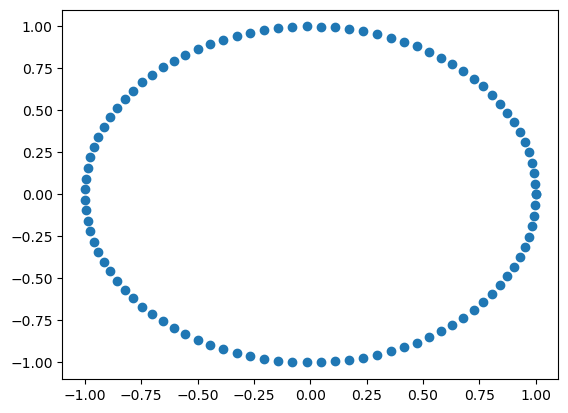

In [40]:
import matplotlib.pyplot as plt
plt.scatter(x_verts, y_verts)

In [98]:
def longestCommonPrefix(Lists) -> str:
    prefix= Lists[0][:2]
    flag = True 
    for i in range(1,len(Lists)):
        if prefix != Lists[i][:2]:
            flag= False
    if flag:
        print(prefix)
    
longestCommonPrefix(['Naman','Ba'])